In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
# Load the dataset from 'train.csv'
df = pd.read_csv('train.csv')

In [6]:
# Display missing values before cleaning
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64


In [7]:
# Drop rows with missing values in 'review/text' and 'user/profileName'
df.dropna(subset=['review/text', 'user/profileName'], inplace=True)

In [8]:
# Drop irrelevant columns
df.drop(columns=['user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix', 'user/gender'], inplace=True)

In [9]:
# Display missing values after cleaning
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
index                0
beer/ABV             0
beer/beerId          0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/text          0
review/timeStruct    0
review/timeUnix      0
user/profileName     0
dtype: int64


In [10]:

# Convert Unix timestamps in 'review/timeUnix' to datetime format
df['review/timeUnix'] = pd.to_datetime(df['review/timeUnix'], unit='s')


In [11]:
# Apply TF-IDF vectorization on the 'review/text' column with a maximum of 5000 features and stop words removed
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = tfidf.fit_transform(df['review/text']).toarray()


In [12]:
# Extract numerical features for the model
numerical_features = df[['review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'beer/ABV']]


In [ ]:
# Combine TF-IDF features and numerical features into a single feature set
X = np.hstack((X_text, numerical_features.values))

# Define the target variable (overall rating)
y = df['review/overall'].values

In [14]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize Random Forest and Linear Regression models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()

In [ ]:
# Train the models on the training data
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

In [23]:
# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

In [24]:
# Evaluate Random Forest model performance
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest MAE: {rf_mae:.4f}, MSE: {rf_mse:.4f}, R2: {rf_r2:.4f}")

Random Forest MAE: 0.2938, MSE: 0.1496, R2: 0.6905


In [25]:
# Evaluate Linear Regression model performance
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)


In [26]:

print(f"Linear Regression MAE: {lr_mae:.4f}, MSE: {lr_mse:.4f}, R2: {lr_r2:.4f}")

Linear Regression MAE: 0.3137, MSE: 0.1641, R2: 0.6604


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

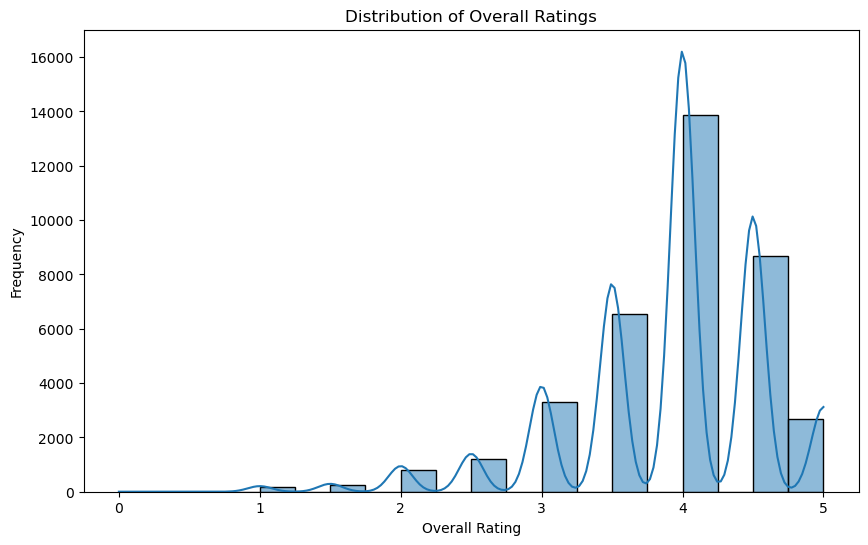

In [28]:
# Visualize the distribution of overall ratings

plt.figure(figsize=(10, 6))
sns.histplot(df['review/overall'], bins=20, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

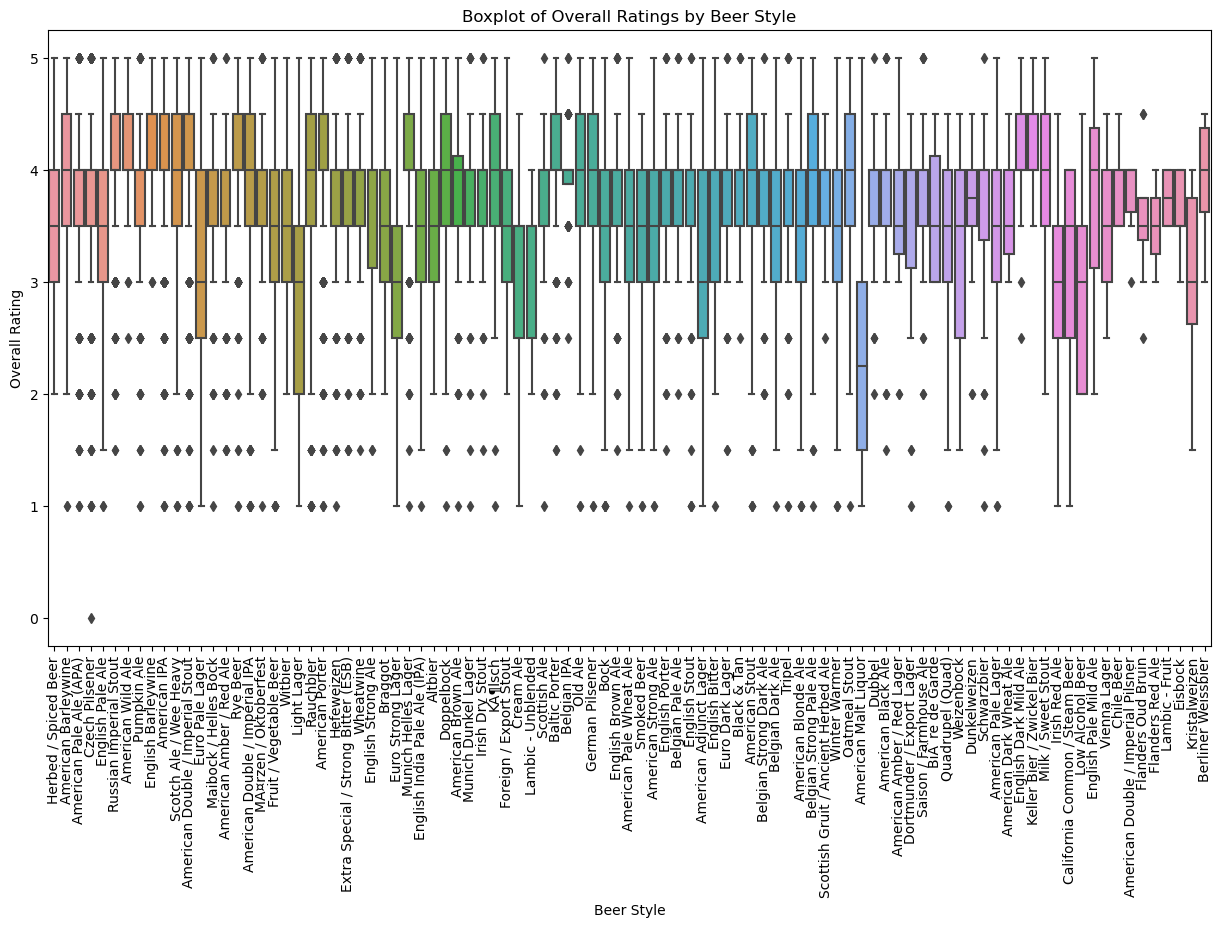

In [29]:
# Visualize overall ratings by beer style
plt.figure(figsize=(15, 8))
sns.boxplot(x='beer/style', y='review/overall', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Overall Ratings by Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Overall Rating')
plt.show()

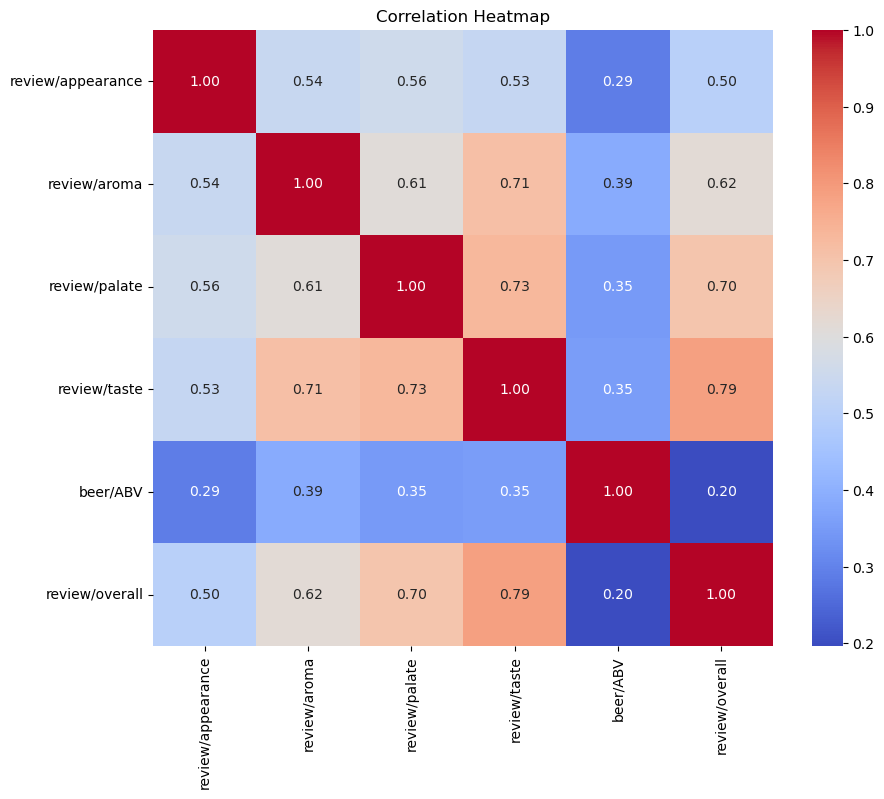

In [30]:
# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'beer/ABV', 'review/overall']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
# Visualize actual vs predicted values for a sample of the test data
np.random.seed(42)
sample_size = 100
sample_indices = np.random.choice(len(y_test), size=sample_size, replace=False)
sampled_actual = y_test[sample_indices]
sampled_rf_predictions = rf_predictions[sample_indices]
sampled_lr_predictions = lr_predictions[sample_indices]

# Sort sampled data for better visualization
sorted_sample_indices = np.argsort(sampled_actual)
sorted_actual = sampled_actual[sorted_sample_indices]
sorted_rf_predictions = sampled_rf_predictions[sorted_sample_indices]
sorted_lr_predictions = sampled_lr_predictions[sorted_sample_indices]

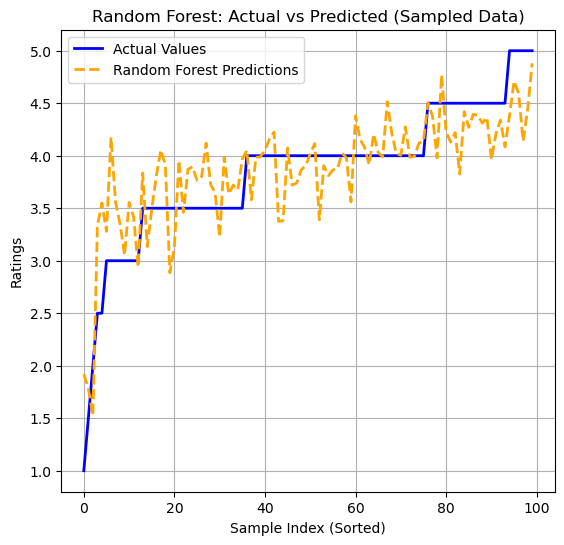

In [38]:
# Create line charts for Random Forest and Linear Regression predictions
plt.figure(figsize=(14, 6))

# Random Forest predictions vs actual values
plt.subplot(1, 2, 1)
plt.plot(sorted_actual, label='Actual Values', color='blue', linewidth=2)
plt.plot(sorted_rf_predictions, label='Random Forest Predictions', color='orange', linestyle='--', linewidth=2)
plt.title('Random Forest: Actual vs Predicted (Sampled Data)')
plt.xlabel('Sample Index (Sorted)')
plt.ylabel('Ratings')
plt.legend()
plt.grid()

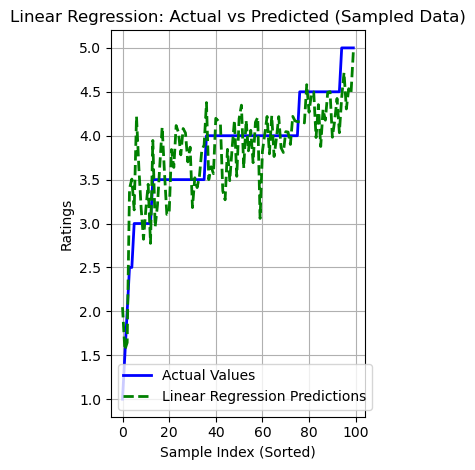

In [39]:
# Linear Regression predictions vs actual values
plt.subplot(1, 2, 2)
plt.plot(sorted_actual, label='Actual Values', color='blue', linewidth=2)
plt.plot(sorted_lr_predictions, label='Linear Regression Predictions', color='green', linestyle='--', linewidth=2)
plt.title('Linear Regression: Actual vs Predicted (Sampled Data)')
plt.xlabel('Sample Index (Sorted)')
plt.ylabel('Ratings')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()